In [1]:
%pip install tensorflow
                           

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 1.7 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 2.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 1.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.2/242.2 KB 5.9 MB/s eta 0:00:00a 0:00:01
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 KB 503.9 kB/s eta 0:00:00a 0:00:01
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [24]:
%pip install transformers

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [11]:
%pip install torch torchvision torchaudio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 MB 5.9 MB/s eta 0:00:0000:01m00:03
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 1.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 2.1 MB/s eta 0:00:00a 0:00:01
  Using cached sympy-1.12-py3-none-any.whl (5.7 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 1.4 MB/s eta 0:00:00a 0:00:01
  Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import csv
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, BertTokenizer, BertModel, BertConfig
import torch
import re
import os
from torch.utils.data import TensorDataset, DataLoader, Dataset, RandomSampler, SequentialSampler

In [3]:
#set GPUS
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'


In [4]:
MAX_LENS = 200
Batch_size = 16
learning_rate = 5e-5
number_epoch = 5


In [5]:
#build bert model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

In [6]:
#construct bert model

class bert_model(torch.nn.Module):
    #construct class
    def __init__(self):
        super().__init__()
        self.bert_model = BertModel.from_pretrained('bert-base-uncased')
        self.drop = torch.nn.Dropout(0.3)
        self.out = torch.nn.Linear(768,11)
    
    def forward(self, ids, mask, token_type_ids):
        unw, out = self.bert_model(ids, attention_mask = mask, token_type_ids = token_type_ids)[0], self.bert_model(ids, attention_mask = mask, token_type_ids = token_type_ids)[1]
        #add drop layer
        drop_out = self.drop(out)
        #final layer
        out_final = self.out(drop_out)
        return out_final
    

model_bert = bert_model()
model_bert.to(device)




        
        

bert_model(
  (bert_model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_

In [7]:
#get my current path
current_path = os.getcwd()
print(current_path)
file_path_chapter_four = '/Users/wangxuechun/unsw/UNSW-Thesis-/chapter_4_eng_version_hsien.csv'

/Users/wangxuechun/unsw/UNSW-Thesis-


In [8]:
#modified the google dataframe
original_google = pd.read_csv('/Users/wangxuechun/unsw/UNSW-Thesis-/chapter_4_trans.csv')
df_modified_google = original_google.drop('Chinese_verse', axis=1)
df_google = df_modified_google.rename(columns={'English_Verse': 'English_Verse_chap4_google'})
df_google.to_csv('/Users/wangxuechun/unsw/UNSW-Thesis-/chapter_4_eng_version_google.csv')

In [9]:
#load my dataset
df_chapter_four = pd.read_csv(file_path_chapter_four)
df_chapter_four.head()


,English_Verse_chap4_hsien
0,There are said to be some victors who take no ...
1,"Look at Ah Q, light and elated, as if about to..."
2,This victory was not without strange consequen...
3,"""Ah Q, may you die sonless!"""
4,"These words sounded again in Ah Q's cars, and ..."


In [10]:
#store length of each verses
token_len = []
for verses in df_chapter_four.English_Verse_chap4_hsien:
    tokens = tokenizer.encode(verses, max_length=1000)
    token_len.append(len(tokens))

print(len(token_len))
print(token_len)



Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


45
[151, 18, 126, 13, 150, 22, 47, 15, 104, 157, 182, 12, 77, 155, 38, 25, 22, 18, 10, 11, 15, 20, 10, 33, 101, 11, 56, 21, 132, 110, 23, 17, 34, 15, 168, 89, 34, 14, 67, 40, 27, 16, 21, 16, 159]


Text(0.5, 9.444444444444438, 'Token count')

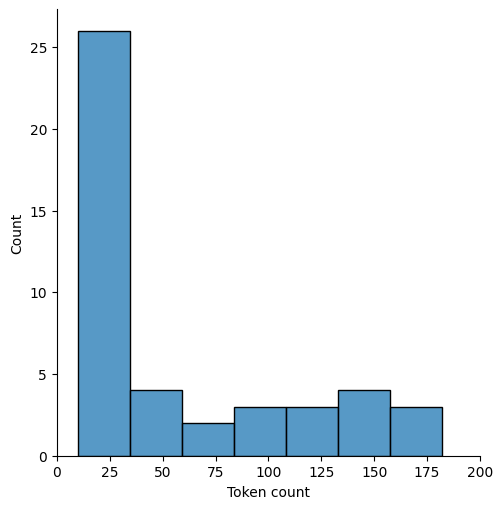

In [11]:
#plot the distribution of paragraphs lengths
sns.displot(token_len)
plt.xlim([0, 200])
plt.xlabel('Token count')

In [12]:
#test function
def test():
    model_bert.eval()
    bert_outputs = []

    with torch.no_grad():
        for unw, data in enumerate(test_loader, 0):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.float)
            outputs = model_bert(ids, mask, token_type_ids)

            bert_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())

    return bert_outputs


In [13]:
#construct my data frame
class DatasetParagraphs(Dataset):
    #intialize function
    def __init__ (self, dataset, tokenizer, max_lens):
        self.tokenizer = tokenizer 
        self.dataset = dataset
        self.tweet = dataset['tweets']
        self.targets = self.dataset.list
        self.max_lens = max_lens


    def __len__(self):
        return len(self.tweet)

    #get item
    def __getitem__(self, num):
        tweet = str(self.tweet[num])
        tweet = " ".join(tweet.split())
        inputs = self.tokenizer.encode_plus(
            tweet,
            None, 
            add_special_tokens = True,
            max_length = self.max_lens,
            pad_to_max_length = True,
            return_attention_mask = True
        )

        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs['token_type_ids']

        return {
            'ids' : torch.tensor(ids, dtype = torch.long),
            'mask' : torch.tensor(mask, dtype = torch.long),
            'token_type_ids' : torch.tensor(token_type_ids, dtype= torch.long),
            'targets' : torch.tensor(self.targets[num], dtype = torch.float)
        }

    


In [14]:
#code optimization sentiment analysis
file_paths = ['/Users/wangxuechun/unsw/UNSW-Thesis-/chapter_4_eng_version_hsien.csv', '/Users/wangxuechun/unsw/UNSW-Thesis-/chapter_4_eng_version_google.csv', '/Users/wangxuechun/unsw/UNSW-Thesis-/chapter_4_eng_version_yiyun.csv']
suffixes = ['hsien', 'google', 'yiyun']
df_list_count = []
for i, suffix in zip(file_paths, suffixes):

    #load the dataset
    df = pd.read_csv(i)
    df_new = pd.DataFrame()
    column_name = f"English_Verse_chap4_{suffix}"
    df_new['tweets'] = df[column_name]
    values = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]] * len(df)
    df_new['list'] = values

    #customize my dataset
    dataset_new = DatasetParagraphs(df_new, tokenizer, MAX_LENS)
    param = {'batch_size' : 1,
            'shuffle' : False,
            'num_workers' : 0
    }

    test_loader = DataLoader(dataset_new, **param)
    test_outputs = test()

    #we got the test outputs values
    test_outputs = np.array(test_outputs)

    for i in range(test_outputs.shape[0]):
        for j in range(test_outputs.shape[1]):
                if test_outputs[i][j] >= 0.5:
                    test_outputs[i][j] = 1
                else:
                    test_outputs[i][j] = 0
    df_new['Optimistic'] = "None"
    df_new['Thankful'] = "None"
    df_new['Empathetic'] = "None"
    df_new['Pessimistic'] = "None"
    df_new['Anxious'] = "None"
    df_new['Sad'] = "None"
    df_new['Annoyed'] = "None"
    df_new['Denial'] = "None"
    df_new['Official report'] = "None"
    df_new['Surprise'] = "None"
    df_new['Joking'] = "None"

    for i in range(len(test_outputs)):
        df_new['Optimistic'].iloc[i] = test_outputs[i][0]
        df_new['Thankful'].iloc[i] = test_outputs[i][1]
        df_new['Empathetic'].iloc[i] = test_outputs[i][2]
        df_new['Pessimistic'].iloc[i] = test_outputs[i][3]
        df_new['Anxious'].iloc[i] = test_outputs[i][4]
        df_new['Sad'].iloc[i] = test_outputs[i][5]
        df_new['Annoyed'].iloc[i] = test_outputs[i][6]
        df_new['Denial'].iloc[i] = test_outputs[i][7]
        df_new['Official report'].iloc[i] = test_outputs[i][8]
        df_new['Surprise'].iloc[i] = test_outputs[i][9]
        df_new['Joking'].iloc[i] = test_outputs[i][10]
    
    #deep clean the dataframe
    df_new = df_new.drop(['list','Official report'], axis = 1)
    df_count = pd.DataFrame()

    df_count = pd.DataFrame(index=[0], columns=['Optimistic', 'Thankful', 'Empathetic', 'Pessimistic', 'Anxious', 'Sad', 'Annoyed', 'Denial', 'Surprise', 'Joking'])
    df_count[:] = "None"

    # Define a function to count 1.0 in columns
    def count_ones(column):
        return (df_new[column] == 1.0).sum()
    
    # Use the function to count and assign values
    df_count['Optimistic'] = count_ones('Optimistic')
    df_count['Thankful'] = count_ones('Thankful')
    df_count['Empathetic'] = count_ones('Empathetic')
    df_count['Pessimistic'] = count_ones('Pessimistic')
    df_count['Anxious'] = count_ones('Anxious')
    df_count['Sad'] = count_ones('Sad')
    df_count['Annoyed'] = count_ones('Annoyed')
    df_count['Denial'] = count_ones('Denial')
    df_count['Surprise'] = count_ones('Surprise')
    df_count['Joking'] = count_ones('Joking')

    df_list_count.append(df_count)

df_list_count



    
    
    
    
    

    

    

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2619: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2619: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length`

[   Optimistic  Thankful  Empathetic  Pessimistic  Anxious  Sad  Annoyed  \
 0           5        42          42           43        5   30       39   
 
    Denial  Surprise  Joking  
 0      26        41      44  ,
    Optimistic  Thankful  Empathetic  Pessimistic  Anxious  Sad  Annoyed  \
 0           1        44          44           43        3   35       42   
 
    Denial  Surprise  Joking  
 0      25        44      45  ,
    Optimistic  Thankful  Empathetic  Pessimistic  Anxious  Sad  Annoyed  \
 0           1        39          39           38        3   28       37   
 
    Denial  Surprise  Joking  
 0      23        39      41  ]

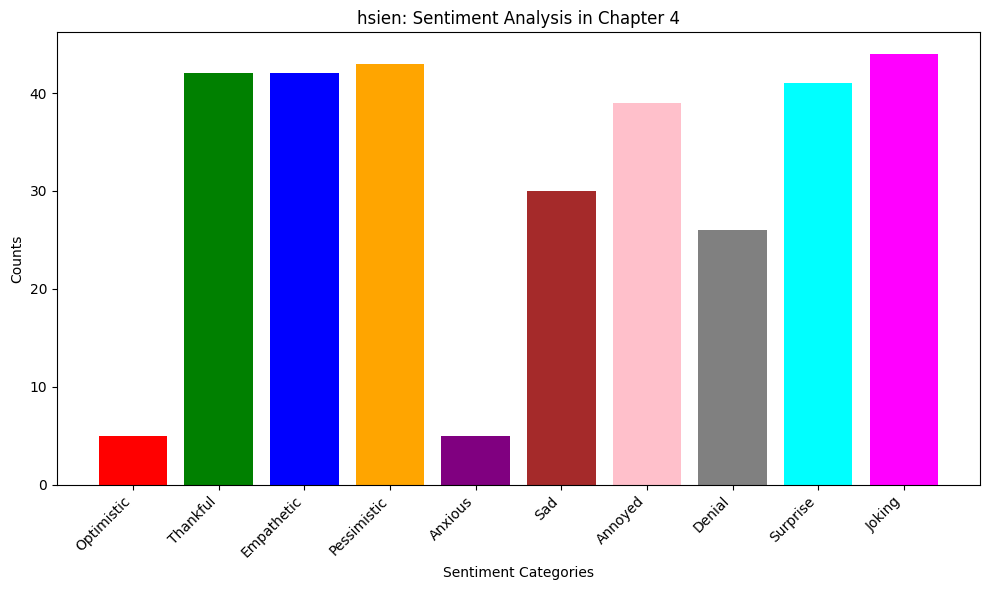

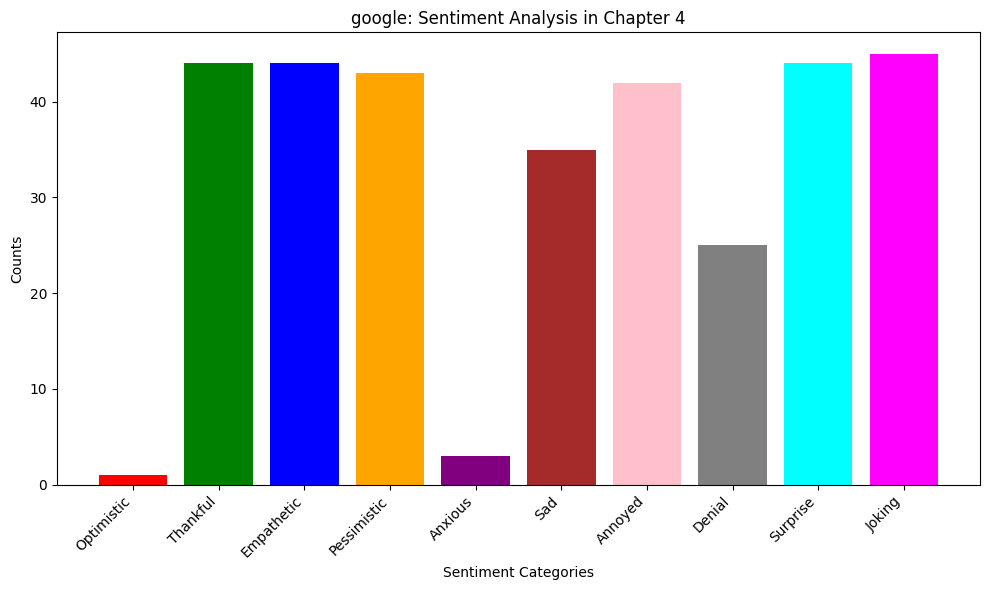

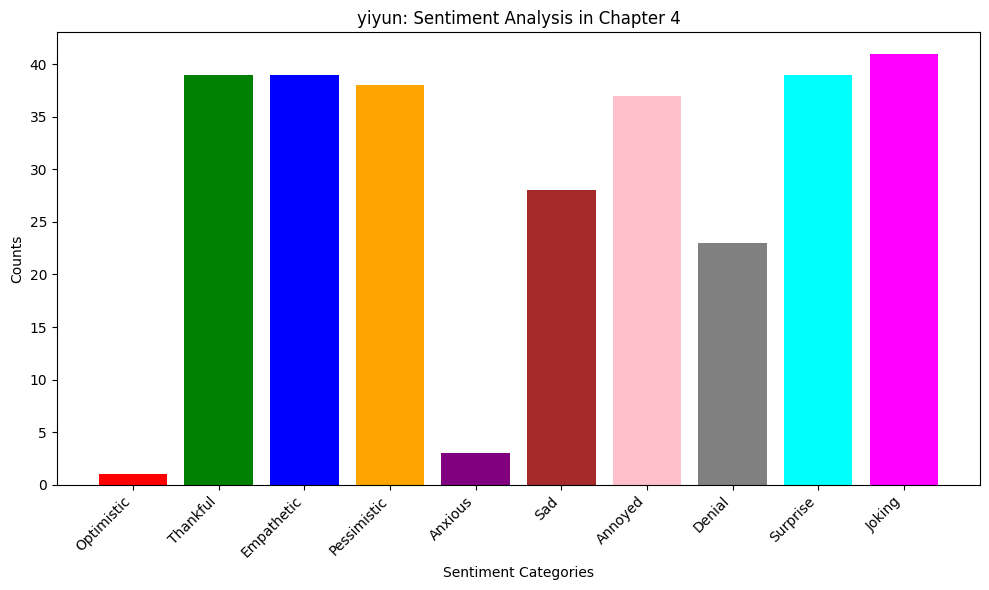

In [25]:
#visualization (code optimization)

#convert dataset type
dataframes_numeric = [df.apply(pd.to_numeric) for df in df_list_count]
combined_df_numeric = pd.concat(dataframes_numeric, ignore_index=True)

# Define a list of colors (the length should match the number of categories/columns)
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']

for i in range(len(dataframes_numeric)):
    row = combined_df_numeric.iloc[i]
    if len(colors) >= len(row):
        plt.figure(figsize=(10, 6))  # Set the figure size
        plt.bar(row.index, row.values, color=colors)  # Plot the bars with specified colors
        
        # Adding titles and labels
        plt.title(f'{suffixes[i]}: Sentiment Analysis in Chapter 4')
        plt.xlabel('Sentiment Categories')
        plt.ylabel('Counts')
        plt.xticks(rotation=45, ha='right')  # Rotate x labels
        
        plt.tight_layout()  # Adjust subplot parameters
        plt.show()
    




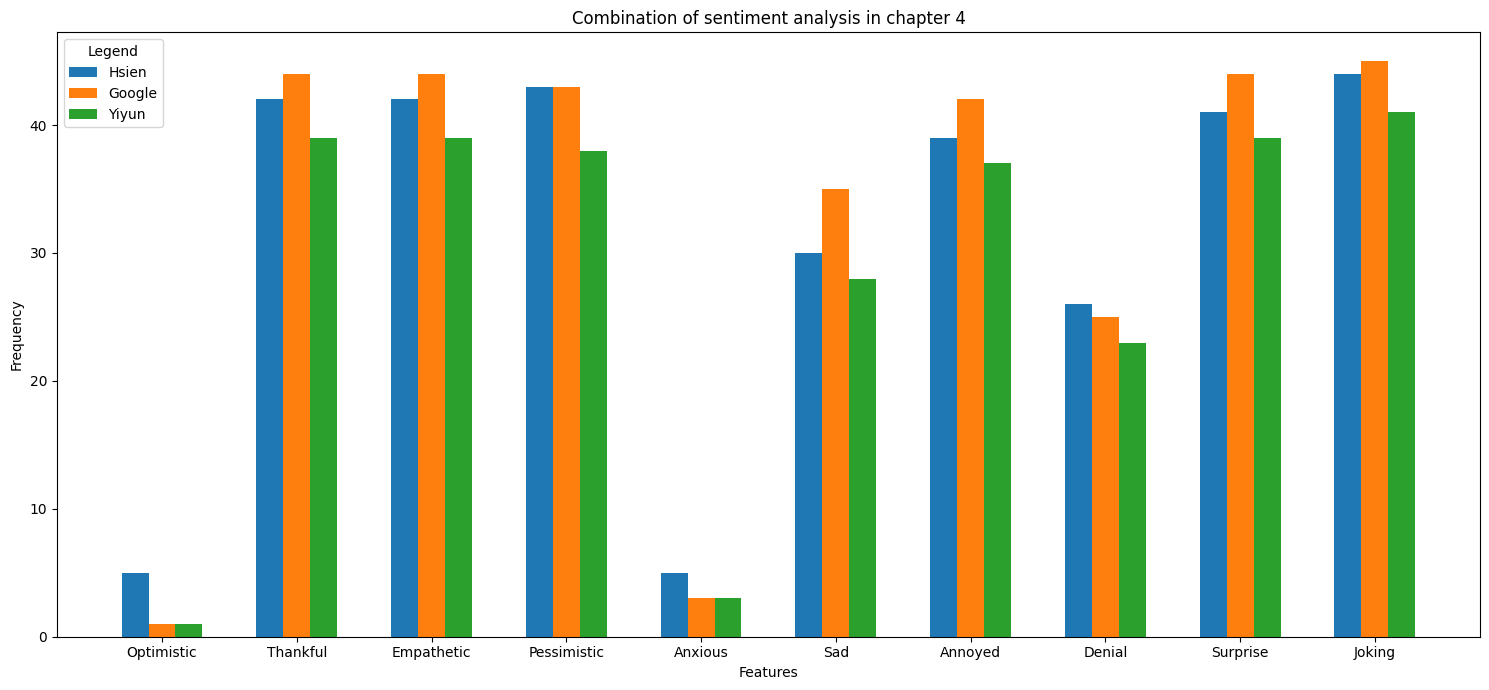

In [26]:
# Number of rows in the DataFrame
num_rows = combined_df_numeric.shape[0]
# Number of columns (features) in the DataFrame
num_columns = combined_df_numeric.shape[1]
# Create an array with the position of each bar along the x-axis
bar_positions = np.arange(num_columns)

# Set the width of each bar
bar_width = 0.2

# define legends name
legend_name = ['Hsien', 'Google', 'Yiyun']

# Plotting
plt.figure(figsize=(15, 7))

# Plot a bar for each row
for i in range(num_rows):
    plt.bar(bar_positions + i * bar_width, combined_df_numeric.iloc[i, :], width=bar_width, label=legend_name[i])

# Set the position and labels for the x-axis ticks
plt.xticks(bar_positions + bar_width, combined_df_numeric.columns)

# Adding titles and labels
plt.title('Combination of sentiment analysis in chapter 4')
plt.xlabel('Features')
plt.ylabel('Frequency')
plt.legend(title="Legend")  # Show legend with title

# Show the plot
plt.tight_layout()  # Adjust subplot parameters to give specified padding.
plt.show()